# Example 9.2: Otto Cycle (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
An Otto cycle with compression ratio of $8$ starts its compression stroke from $p_1=1\ \text{bar}$, $T_1=300\ \text{K}$.  The maximum temperature after combustion is $1200\ \text{K}$.  
Determine:
* (a) $p$-$v$ diagram
* (b) $T$-$s$ diagram
* (c) $T$,$p$ at each state
* (d) $q_{in}$
* (e) $w_{net}$
* (f) $\eta_{th}$

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074244&node=10465167&a=685460354&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI_K import *
air = idealgas.Properties('Air', unit_system='SI_K')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[1] = Quantity(300,'K')
p[1] = Quantity(1,'bar')
T_max = Quantity(1200,'K')
r = Quantity(8,'')

Calculations();

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Assumptions
  - Treat air as an ideal gas
  - Variable Specific Heat

In [3]:
# Ideal Gas
R = air.R

# Constant thermal properties at room temperature
T_room = Quantity(300,'degC')
c_p = air.Cp(T=T_room)
c_v = air.Cv(T=T_room)
k = air.k(T=T_room)
R = air.R

Calculations();

 Ideal Gas

<IPython.core.display.Latex object>

 Constant thermal properties at room temperature

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (c) $T$,$p$ at each state 

In [4]:
# Isentropic Compression $1\to2$
v[1] = R*T[1]/p[1]
v[2] = v[1]/r
# Isentropic Ideal Gas Relations
T[2] = T[1]*(v[1]/v[2])**(k-1)
p[2] = T[2]*R/v[2]

# Isochoric Heat Addition $2\to3$
v[3] = v[2]
T[3] = T_max
p[3] = T[3]*R/v[3]

# Isentropic Expansion $3\to4$
v[4] = r*v[3]
T[4] = T[3]*(v[3]/v[4])**(k-1)
p[4] = T[4]*R/v[4]


Calculations();
states.display();

 Isentropic Compression $1\to2$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isochoric Heat Addition $2\to3$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic Expansion $3\to4$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,T,p,v
unit,K,kPa,m³/kg
1,300.000000,100.000000,0.861158
2,659.680798,1759.148794,0.107645
3,1200.000000,3200.000000,0.107645
4,545.718477,181.906159,0.861158


### Plotting
*Note: The plotting library using the property tables to draw the process paths, which inherently assumes variable specific heat (i.e. real-fluid or air-standard assumptions).  If the library is used to draw process paths between states that were obtained using constant specific heat (cold-air-standard assumptions) there will be inconsistencies between the state points and the process paths.*

In order to plot the paths of the cycle on the $p$-$v$ diagram and states on the $T$-$s$ diagram, we need discrete values for the specifc enthalpy and entropy at each state rather than just the changes in properties we calculated above.  To do this, we will use the variable specific heat tables for the other properties to enable us to draw the paths.  The isentropic lines do not line up exactly with the states in this diagram because the entropies were calculated for variable specific heat, but all other properties were calculated using the
cold-air-standard assumptions (constant specific heat).  

#### (a) $p$-$v$ diagram 

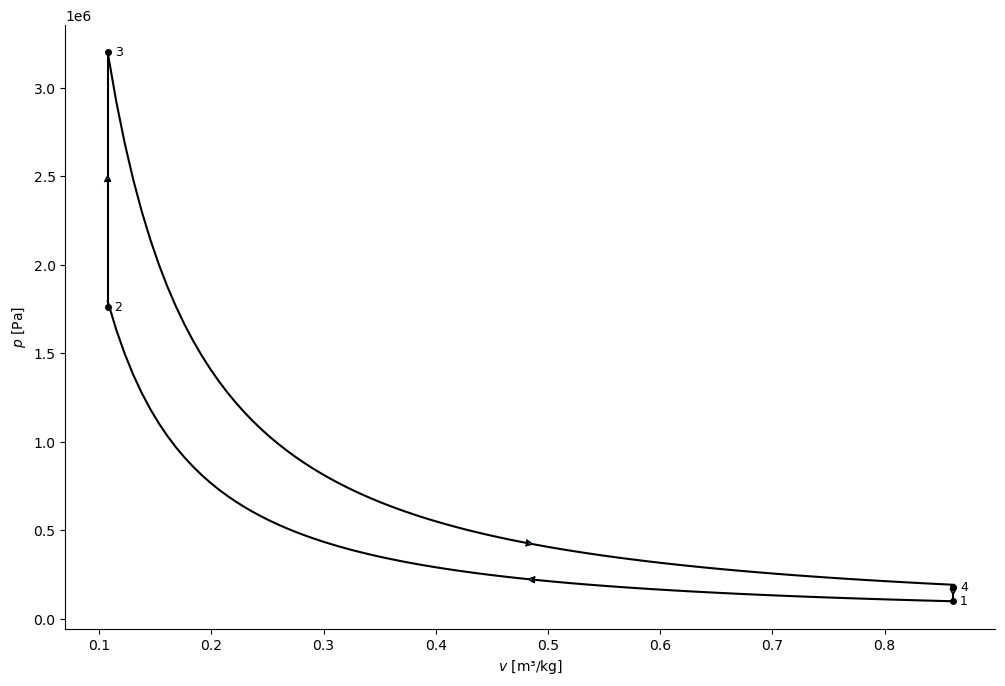

In [5]:
pv = air.pv_diagram()
from math import log

for i in [1,2,3,4]:
    h[i] = air.h(T=T[i])
    s[i] = air.s(T=T[i],p=p[i])

for i in [1,2,3,4]:
    pv.plot_state(states[i],label_loc='east')
    
pv.plot_process(states[1],states[2],path='isentropic')
pv.plot_process(states[2],states[3],path='isochoric')
pv.plot_process(states[3],states[4],path='isentropic')
pv.plot_process(states[4],states[1],path='isochoric');

#### (b) $T$-$s$ diagram 
**Note: the isentropic lines are not vertical in this diagram because the entropies were 
calculated for variable specific heat**, but all other properties were calculated using the
cold-air-standard assumptions (constant specific heat).  Therefore the errors resulting from the constant specific heat assumption are evident in the skewed shape of the cycle on the $T$-$s$ diagram.

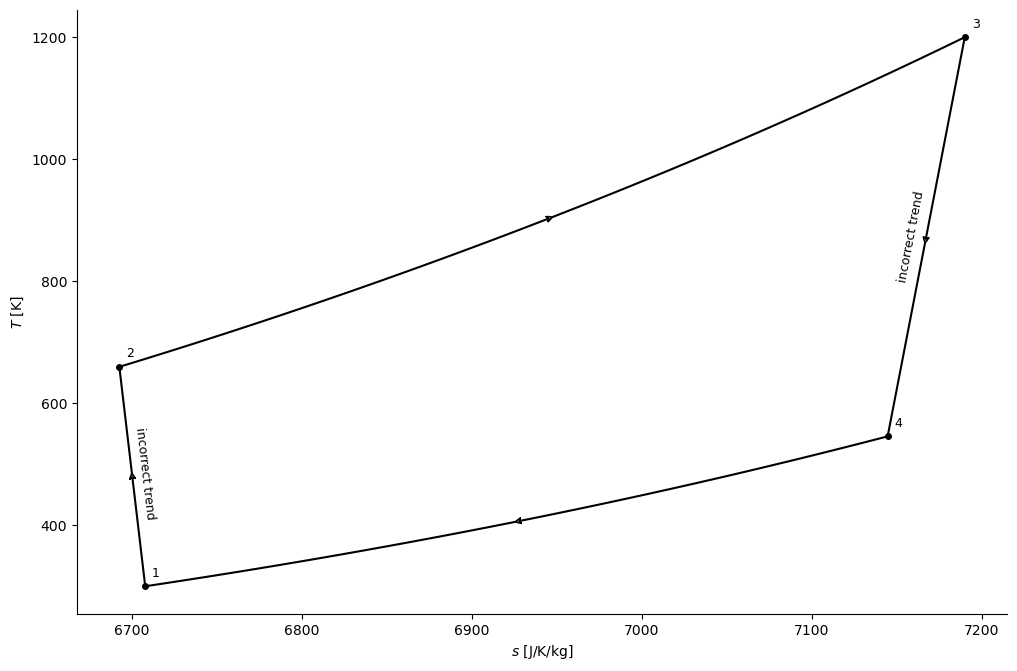

In [6]:
Ts = air.Ts_diagram()

for i in [1,2,3,4]:
    Ts.plot_state(states[i], label_loc='north east')

Ts.plot_process(states[1],states[2],label='incorrect trend',path='isentropic')
Ts.plot_process(states[2],states[3],path='isochoric')
Ts.plot_process(states[3],states[4],label='incorrect trend',path='isentropic')
Ts.plot_process(states[4],states[1],path='isochoric');

#### (d) $q_{in}$

In [7]:
# Heat transfer only takes place from $2\to3$ and from $4\to1$
# First Law from 2 to 3 to find the heat input
q_2_to_3 = c_v*(T[3]-T[2])
q_in = q_2_to_3

Calculations();

 Heat transfer only takes place from $2\to3$ and from $4\to1$

 First Law from 2 to 3 to find the heat input

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (e) $w_{net}$

In [8]:
# First Law from 4 to 1 to find the heat rejection
q_4_to_1 = c_v*(T[4]-T[1])
q_out = q_4_to_1

w_net = q_in-q_out

Calculations();

 First Law from 4 to 1 to find the heat rejection

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (f)  $\eta_{th}$

In [9]:
# Thermal efficiency
eta_th = w_net/q_in

Calculations();

 Thermal efficiency

<IPython.core.display.Latex object>

In [10]:
Summary()
Summary(['q_in','w_net','eta_th']);

<IPython.core.display.Latex object>

,T,p,v,h,s
unit,K,kPa,m³/kg,kJ/kg,kJ/K/kg
1,300.000000,100.000000,0.861158,-2.407134,6.707700
2,659.680798,1759.148794,0.107645,367.731544,6.692465
3,1200.000000,3200.000000,0.107645,974.975671,7.189906
4,545.718477,181.906159,0.861158,247.929071,7.144519


<IPython.core.display.Latex object>